In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
import keras
from keras import layers
from keras.applications import EfficientNetB3
import zipfile,os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split= 0.2)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split= 0.2)

train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/samph',
                                             batch_size=64,
                                             target_size=(300,300),
                                             subset='training',
                                             class_mode='binary'
                                             )
test_data=test_datagen.flow_from_directory('/content/drive/MyDrive/samph',
                                                       batch_size=64,
                                                       target_size=(300,300),
                                                       subset='validation',
                                                       class_mode='binary')



Found 141 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


##CNN

In [ ]:
model = Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# # Mendapatkan informasi tentang jumlah sampel sebelum augmentasi
# total_samples_before_augmentation = train_data.samples

# # Mendapatkan informasi tentang jumlah batch sebelum augmentasi
# total_batches_before_augmentation = len(train_data)

# # Menampilkan informasi
# print("Total Sampel sebelum Augmentasi:", total_samples_before_augmentation)
# print("Total Batch sebelum Augmentasi:", total_batches_before_augmentation)

# # Menampilkan beberapa batch pertama setelah augmentasi
# num_batches_to_display = 5
# for i in range(num_batches_to_display):
#     sample_batch, labels_batch = next(train_data)

# # Mendapatkan informasi tentang jumlah sampel setelah augmentasi
# total_samples_after_augmentation = train_data.samples

# # Mendapatkan informasi tentang jumlah batch setelah augmentasi
# total_batches_after_augmentation = len(train_data)

# # Menampilkan informasi
# print("\nTotal Sampel setelah Augmentasi:", total_samples_after_augmentation)
# print("Total Batch setelah Augmentasi:", total_batches_after_augmentation)


##Test Data

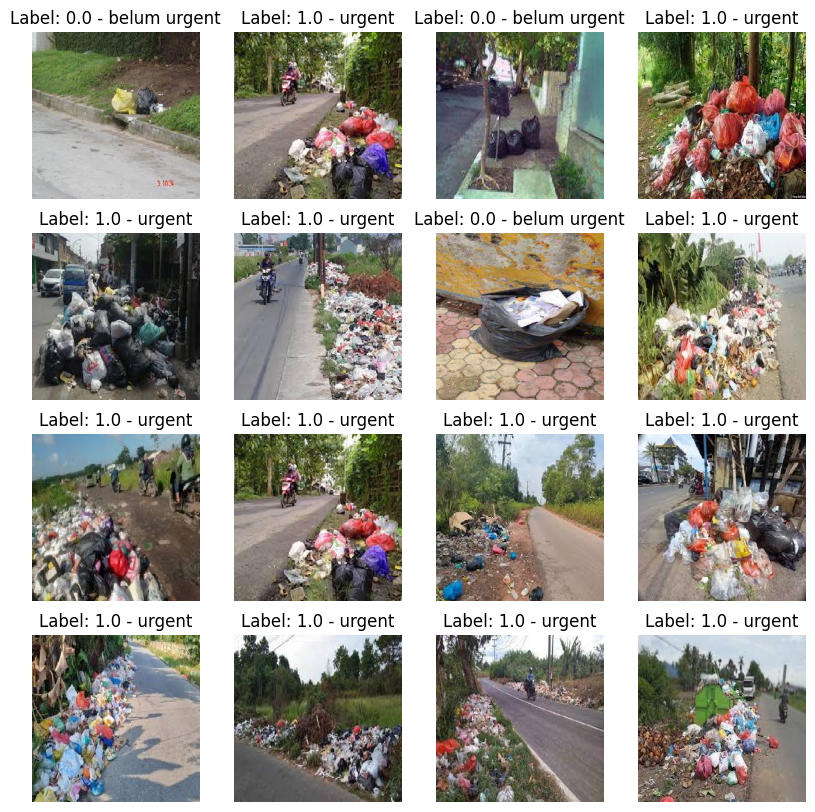

In [ ]:
# Membuat generator untuk mendapatkan satu batch data dari train_data
sample_batch, labels_batch = next(test_data)

# Membuat pemetaan label
label_mapping = {0: 'belum urgent', 1: 'urgent'}

# Menampilkan gambar dan label
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(sample_batch[i])
    axes[i].set_title('Label: {} - {}'.format(labels_batch[i], label_mapping[labels_batch[i]]))
    axes[i].axis('off')

plt.show()


##Train Data

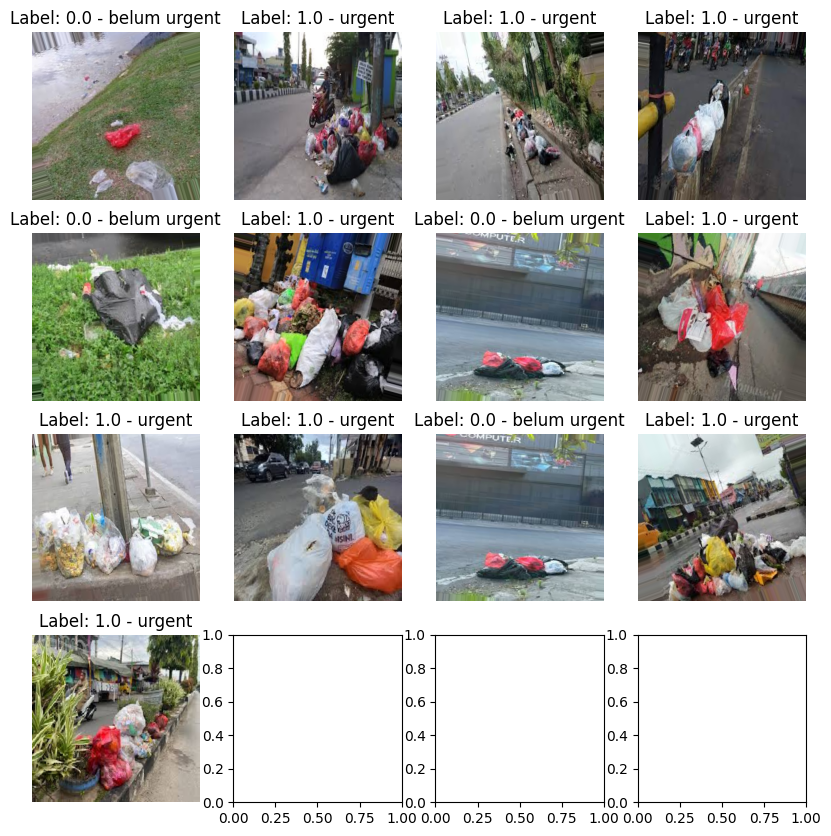

In [ ]:
# Membuat generator untuk mendapatkan satu batch data dari train_data
sample_batch, labels_batch = next(train_data)

# Membuat pemetaan label
label_mapping = {0: 'belum urgent', 1: 'urgent'}

# Menampilkan gambar dan label
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i in range(13):
    axes[i].imshow(sample_batch[i])
    axes[i].set_title('Label: {} - {}'.format(labels_batch[i], label_mapping[labels_batch[i]]))
    axes[i].axis('off')

plt.show()


##Transfer learning Menggunakan EfficientNetB3

In [ ]:
modeltl = EfficientNetB3(include_top=False, weights='imagenet')
pre_trained_model = EfficientNetB3(include_top = False,
                                  weights = "imagenet")

In [ ]:
# model = Sequential([
#     layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
#     layers.MaxPooling2D(2,2),
#     layers.Conv2D(32, (3,3), activation='relu'),
#     layers.MaxPooling2D(2,2),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D(2,2),
#     layers.Flatten(),
#     layers.Dense(512, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

In [ ]:
#model CNN
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 170528)            0         
                                                                 
 dense_10 (Dense)            (None, 512)              

In [ ]:
#model CNN
modeltl.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_12 (Rescaling)    (None, None, None, 3)        0         ['input_7[0][0]']             
                                                                                                  
 normalization_6 (Normaliza  (None, None, None, 3)        7         ['rescaling_12[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_13 (Rescaling)    (None, None, None, 3)        0         ['normalization_6

##Transfer learning Training Layer Non-Trainable

In [ ]:
IMG_SIZE = 300
BATCH_SIZE = 64
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    model = EfficientNetB3(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    # top_dropout_rate = 0.2
    # x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="sigmoid", name="pred")(x)

    # Compile
    model = keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"]
    )
    return model


In [ ]:
IMG_SIZE = 300
BATCH_SIZE = 64
def build_model(pre_trained_model, num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    pre_trained_model = EfficientNetB3(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    pre_trained_model.trainable = False

    # Rebuild top
    # Flatten the output layer to 1 dimension
    x = layers.Flatten()(pre_trained_model.output)

    ### START CODE HERE

    # Add a fully connected layer with 1024 hidden units and ReLU activation
    x = layers.Dense(32, activation="relu")(x)
    # Add a dropout rate of 0.2
    # x = layers.Dropout(0.2)(x)
    # Add a final sigmoid layer for classification
    x = layers.Dense(1, activation="sigmoid")(x)

    # Create the complete model by using the Model class
    model = Model(inputs=pre_trained_model.input, outputs=x)

    # Compile the model
    model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
    return model


In [ ]:
modeltl = build_model(pre_trained_model,num_classes=1)

epochs = 30  # @param {type: "slider", min:8, max:80}
hist = modeltl.fit(train_data, epochs=epochs, validation_data=test_data)

Epoch 1/30
3/3 [==============================] - 19s 3s/step - loss: 4.2998 - accuracy: 0.5603 - val_loss: 4.7680 - val_accuracy: 0.7941
Epoch 2/30
3/3 [==============================] - 5s 1s/step - loss: 3.2322 - accuracy: 0.7730 - val_loss: 3.0381 - val_accuracy: 0.2059
Epoch 3/30
3/3 [==============================] - 4s 2s/step - loss: 2.0728 - accuracy: 0.7376 - val_loss: 5.6813 - val_accuracy: 0.2059
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 4.1515 - accuracy: 0.5177 - val_loss: 0.6052 - val_accuracy: 0.7941
Epoch 5/30
3/3 [==============================] - 6s 2s/step - loss: 2.7826 - accuracy: 0.6950 - val_loss: 3.0778 - val_accuracy: 0.7941
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 2.9939 - accuracy: 0.5035 - val_loss: 3.4578 - val_accuracy: 0.7941
Epoch 7/30
3/3 [==============================] - 4s 2s/step - loss: 2.1796 - accuracy: 0.7730 - val_loss: 1.0620 - val_accuracy: 0.2059
Epoch 8/30
3/3 [========================

##Transfer learning Training Layer Trainable

In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"]
    )


unfreeze_model(model)

epochs = 10  # @param {type: "slider", min:4, max:10}
hist2 = modeltl.fit(train_data, epochs=epochs, validation_data=test_data)

Epoch 1/10
3/3 [==============================] - 20s 2s/step - loss: 0.4776 - accuracy: 0.8227 - val_loss: 0.5264 - val_accuracy: 0.7941
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 0.4525 - accuracy: 0.8085 - val_loss: 0.5256 - val_accuracy: 0.7941
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 0.5091 - accuracy: 0.7660 - val_loss: 0.5262 - val_accuracy: 0.7941
Epoch 4/10
3/3 [==============================] - 4s 981ms/step - loss: 0.4884 - accuracy: 0.7872 - val_loss: 0.5244 - val_accuracy: 0.7941
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 0.5550 - accuracy: 0.7730 - val_loss: 0.5224 - val_accuracy: 0.7941
Epoch 6/10
3/3 [==============================] - 5s 1s/step - loss: 0.4480 - accuracy: 0.7872 - val_loss: 0.5206 - val_accuracy: 0.7941
Epoch 7/10
3/3 [==============================] - 4s 2s/step - loss: 0.5360 - accuracy: 0.7589 - val_loss: 0.5173 - val_accuracy: 0.7941
Epoch 8/10
3/3 [=====================

##CNN Training

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.0001),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
hist = model.fit(train_data, epochs=50, validation_data=test_data)

Epoch 1/50
3/3 [==============================] - 6s 995ms/step - loss: 0.6923 - accuracy: 0.7730 - val_loss: 0.6921 - val_accuracy: 0.7941
Epoch 2/50
3/3 [==============================] - 3s 866ms/step - loss: 0.6922 - accuracy: 0.7730 - val_loss: 0.6920 - val_accuracy: 0.7941
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 0.6920 - accuracy: 0.7730 - val_loss: 0.6919 - val_accuracy: 0.7941
Epoch 4/50
3/3 [==============================] - 4s 2s/step - loss: 0.6919 - accuracy: 0.7730 - val_loss: 0.6918 - val_accuracy: 0.7941
Epoch 5/50
3/3 [==============================] - 4s 905ms/step - loss: 0.6918 - accuracy: 0.7730 - val_loss: 0.6917 - val_accuracy: 0.7941
Epoch 6/50
3/3 [==============================] - 3s 874ms/step - loss: 0.6917 - accuracy: 0.7730 - val_loss: 0.6916 - val_accuracy: 0.7941
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 0.6917 - accuracy: 0.7730 - val_loss: 0.6915 - val_accuracy: 0.7941
Epoch 8/50
3/3 [=============

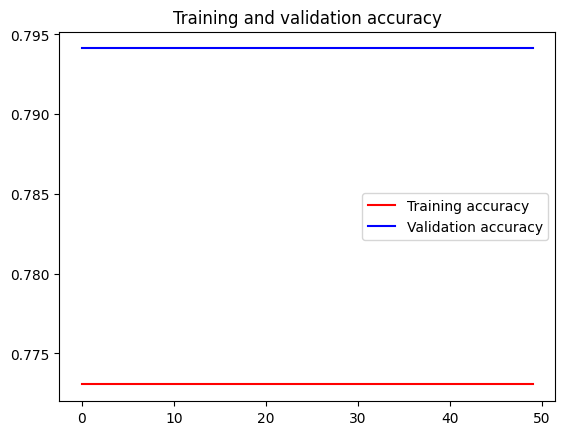

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
#my_callbacks = [
#   tf.keras.callbacks.EarlyStopping(patience=2),
#   tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#]

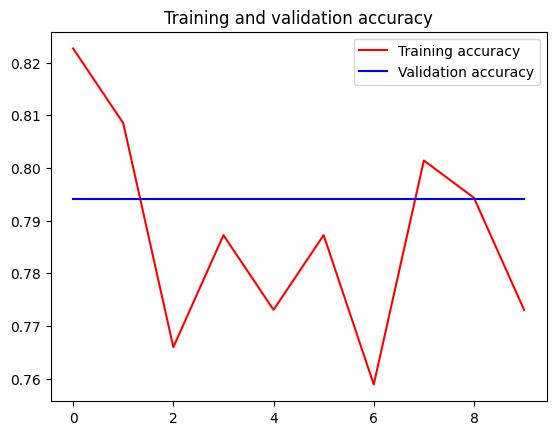

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# uploaded=files.upload()
# for fn in uploaded.keys():
#   path='/content/' + fn
#   img=load_img(path, target_size=(300, 300))
#   x=img_to_array(img)
#   x /= 255
#   x=np.expand_dims(x, axis=0)
#   image_ = np.vstack([x])
#   classes = model.predict(image_, batch_size=10)
#   print(classes[0])

#   if classes[0]>0.5:print(fn + " is garbage")
#   else:print(fn + " is not a garbage")

In [ ]:
# model.save("mymodel.keras")